**Part 1:**<br> Select and download three texts of your choosing that represent different media or writing formats (for example, you could choose i. a novel, movie script, and play script or ii. a short story, poem, and novel, etc.)
**Make sure you briefly descibe your documents and explain the difference between them in a paragraph.** 

**Part 2:**<br>
(a) Compute word counts for each of your documents after excluding English stop words (and optionally, performing lemmatization).<br>
(b) Create and display a bar plot for each document that include word counts for the 25 most frequent words (after the above processing).<br>
(c) Create and display a word cloud for each document (using a mask image of your choice) that includes only the 100 most frequent words.  Note that you'll likely want to use the approach outlined in Session 25 that utilizes the `fitwords` method, since you will want data consistent with those for part (b).<br>(d) Do you see any notable difference between the documents wrt (b) and/or (c) above?  Try to explain why or why not, and whether you would expect such a difference.<br>

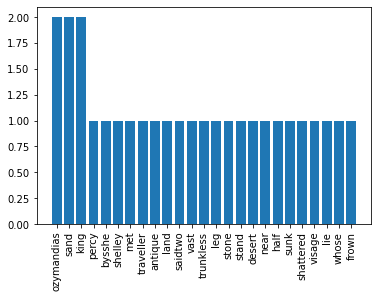

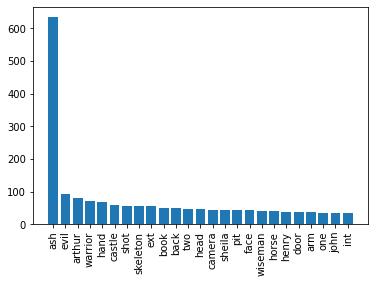

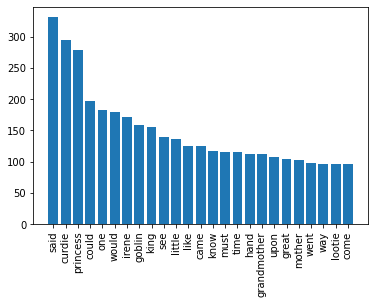

In [199]:
#functions and code to read text for part 2
from textblob import TextBlob, Word
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import pandas as pd 
import imageio

def removeCharactersAndStopWords(wordList):
    return [re.sub('[!@#$.,0123456789?\':()/;`“”"-]', '', word) for word in wordList if word not in stopwords.words('english')]

def getTextBlobFromText(filename):
    words = []
    with open(filename, 'r', encoding='utf-8') as file:
        for line in file:
            for word in line.split():
               words.append(word.lower()) 
    return ProcessText(words)

def ProcessText(text):
    finalWordList = []
    tempWordList = []
    tempWordList = removeCharactersAndStopWords(text)
    for word in tempWordList:
        w = Word(word)
        finalWordList.append(w.lemmatize())

    #idk why I need to run again, but it was adding back 
    #stuff after lemmization and I was tired of trying to fix
    finalWordList = removeCharactersAndStopWords(finalWordList)

    newBlob = TextBlob(' '.join(finalWordList))
    return newBlob

def PlotTop25Words(textBlob):
    wordList = []
    countList = []
    d = Counter(textBlob.word_counts)
    for w, c in d.most_common(25):
        wordList.append(w)
        countList.append(c)

    plt.bar(x=wordList, height=countList)
    plt.xticks(rotation=90)
    plt.show()

ozy = getTextBlobFromText("texts/ozymandius.txt")
aod = getTextBlobFromText("texts/armyOfDarkness.txt")
pag = getTextBlobFromText("texts/princessAndGoblin.txt")

In [ ]:
#output code for part 2
PlotTop25Words(ozy)
PlotTop25Words(aod)
PlotTop25Words(pag)

mask_image = imageio.imread('masks/crown.png')

wordCloud = WordCloud(width=1000, height=1000, colormap="prism", mask=mask_image, background_color='white')
wordCloud = wordCloud.generate(' '.join(pag.words))
wordCloud = wordCloud.to_file('output/pag.png')

mask_image = imageio.imread('masks/chainsaw.png')

wordCloud = WordCloud(width=1000, height=1000, colormap="prism", mask=mask_image, background_color='white')
wordCloud = wordCloud.generate(' '.join(aod.words))
wordCloud = wordCloud.to_file('output/aod.png')

mask_image = imageio.imread('masks/crab.png')

wordCloud = WordCloud(width=1000, height=1000, colormap="prism", mask=mask_image, background_color='white')
wordCloud = wordCloud.generate(' '.join(ozy.words))
wordCloud = wordCloud.to_file('output/ozy.png')